In [2]:
# Pandas is most commonly used for data wrangling and data manipulation purposes
# NumPy is a fundamental library for numerical computing in Python.Mathematical Operations, Arrays,Linear Algebra etc
#Removing Duplicates
#Fixing NULL values(Region,NA_Sales)
# Standardizing categorical values(Country)
#Renaming Columns
#Handling Outliers(Global Sales)

#Create a Bar Chart('National Sales by Region and Country)
#Create Box Plot('Global Sales By Platform)


In [3]:
pip install pandas


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np


df = pd.read_csv('/Users/nargizhasanova/Desktop/VideoGamesProject-main/VideoGamesSales.csv')
#df.shape[0] #number of rows
#df.shape[1] #number of columns
#df = df[df.duplicated()] #returns the duplicates
#df
#df[df.duplicated()] #or just like this in one line
#df.shape[0]

#now removing duplicates

df = df.drop_duplicates()
#df.shape[0]

#fixing null values

#check which column has null values

#df.info()

df["Publisher"] = df["Publisher"].fillna("Sony Computer Entertainment")
df["Region"] = df["Region"].fillna("North")

#df.info()

#get top 20 raws of data
#df.head(20)
#get last 20 raws of data
#df.tail(20)

#now replace values in NA_Sales column with values without $ sign
df["NA_Sales"] = df["NA_Sales"].replace("[$]","", regex =  True)
df["NA_Sales"] = pd.to_numeric(df['NA_Sales'], errors = 'coerce')

#here fill in empty boxes of "NA_Sales" column with Average of "NA_Sales"
Average_Sales=df['NA_Sales'].mean()
Average_Sales = int(Average_Sales)
df["NA_Sales"] = df["NA_Sales"].fillna(Average_Sales)


# now replace "USA" with "United States" in the "Country" column
df["Country"] = df["Country"].replace({"USA" : "United States"})

#here turn lower case initial latter into upeer case latters
df["Country"] = df["Country"].str.title()

#df = df[df["Country"] == "Australia"]
#count the rows with Australia only
#df.shape[0]

# here rename the column headings
df = df.rename(columns = {"NA_Sales" : "National Sales", "Global_Sales" : "Global Sales", "NA_Profit" : "National Profit", "Global_Profit" : "Global Profit"})



sales_cap = df["National Sales"].quantile(0.95)
#sales_cap_int = int(sales_cap)
#print(sales_cap_int)


df["National Sales"] = np.where(df["National Sales"] > sales_cap, sales_cap, df["National Sales"])
#df['National Sales'] = np.where(df['National Sales'] > sales_cap, sales_cap, df['National Sales'])
df

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,2.07,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,2.07,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,2.07,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,2.07,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,2.07,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


In [36]:
pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


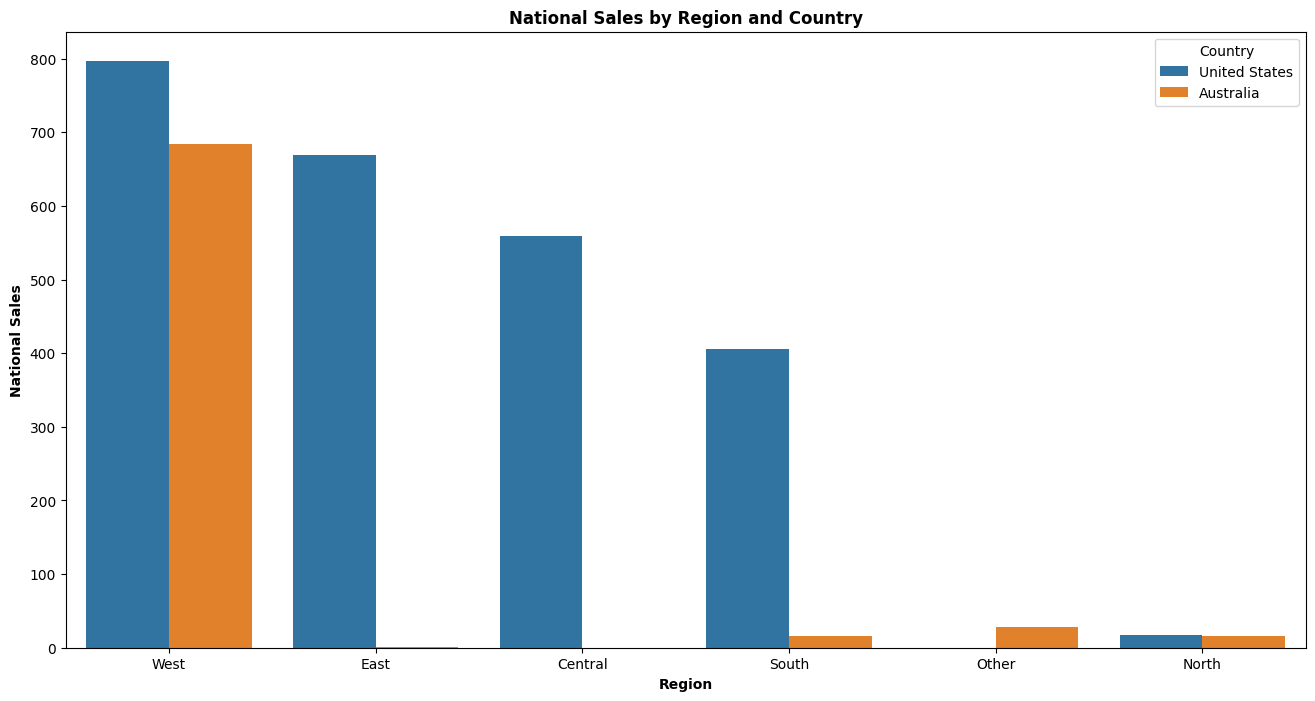

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


#create a bar Chart and use Country and Region to display National Sales

#National_Sales = df.groupby(["Region", "Country"])["National Sales"].sum()
National_Sales=df.groupby(['Region','Country'])['National Sales'].sum().reset_index().sort_values(by = 'National Sales', ascending = False)
National_Sales


#decide of size of the plot

plt.figure(figsize=(16,8))
sns.barplot(data=National_Sales, x = "Region", y = "National Sales", hue = "Country")

#add a tiple

plt.title("National Sales by Region and Country", fontweight = 'bold')
plt.xlabel("Region", fontweight = 'bold')
plt.ylabel("National Sales", fontweight = 'bold')
plt.show()


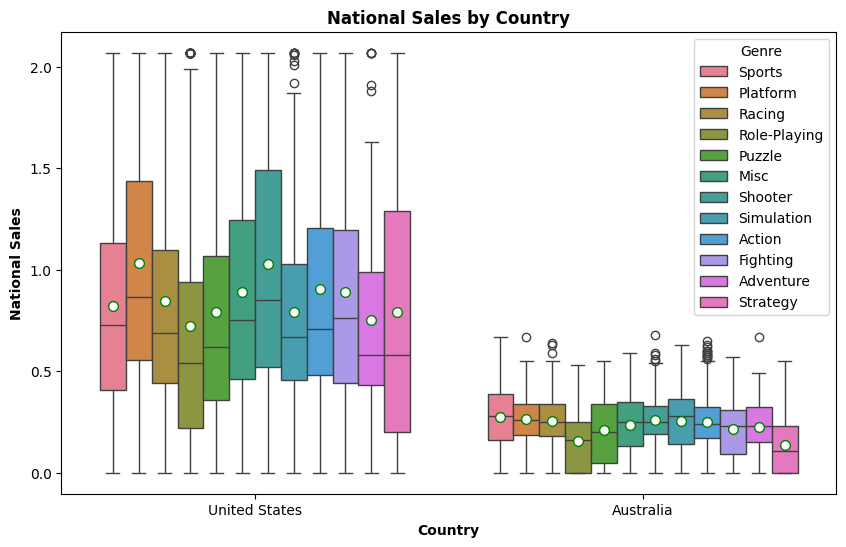

In [57]:
# create a box plot



plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='National Sales', data=df, showmeans = True, hue = 'Genre', meanprops ={'marker' : 'o'
                                                                                                   , 'markerfacecolor' : 'white'
                                                                                                   , 'markersize' : '7'
                                                                                                   , 'markeredgecolor' : 'green' })

#sns.boxplot(x='Country', y='National Sales', data=df, hue = 'Genre')

plt.title("National Sales by Country", fontweight = 'bold')
plt.xlabel("Country", fontweight = 'bold')
plt.ylabel("National Sales", fontweight = 'bold')
plt.show()







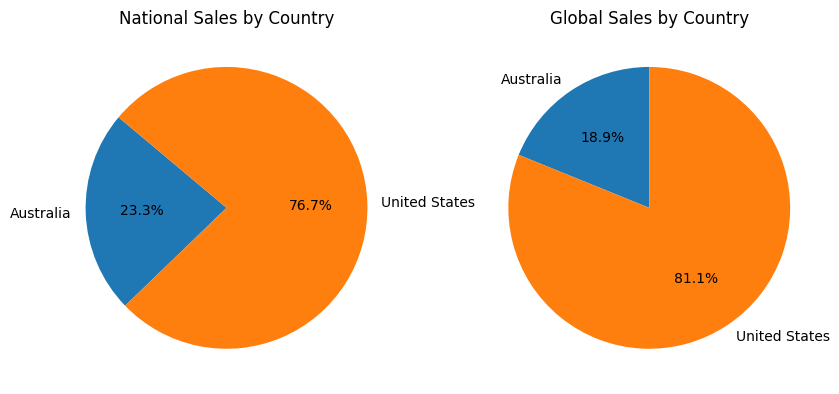

In [60]:
# create a piechart


Sales = df.groupby(['Country'])[['National Sales', 'Global Sales']].sum().reset_index() #.sort_values(by = 'National Sales', ascending = False)
#Sales
Country = Sales["Country"]
National_Sales = Sales["National Sales"]
Global_Sales = Sales["Global Sales"]



fig, axs = plt.subplots(1, 2, figsize=(10,7))

axs[0].pie(National_Sales, labels = Country, autopct = '%1.1f%%', startangle = 140)
axs[0].set_title('National Sales by Country')


axs[1].pie(Global_Sales, labels=Country, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Global Sales by Country')

plt.show()







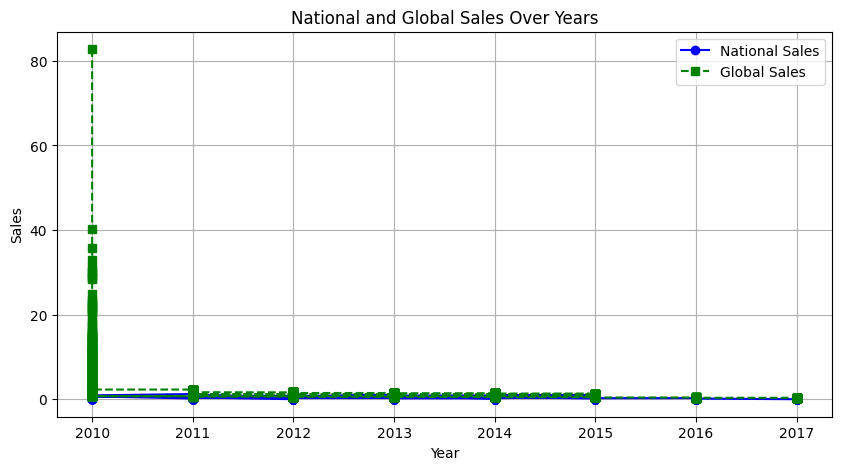

In [73]:
# Create a line chart
plt.figure(figsize=(10, 5))

# Line for National Sales
plt.plot(df['Year'], df['National Sales'], marker='o', linestyle='-', color='b', label='National Sales')

# Line for Global Sales
plt.plot(df['Year'], df['Global Sales'], marker='s', linestyle='--', color='g', label='Global Sales')

# Adding titles and labels
plt.title('National and Global Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

# Display the line chart
plt.grid(True)
plt.show()



